### 1. Importing The Dependencies


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import loguniform
from sklearn.model_selection import ParameterSampler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import time
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    balanced_accuracy_score, matthews_corrcoef
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
)

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

### 2. Data Loading and Understanding

In [6]:
df = pd.read_csv("customer_churn_dataset.csv")

In [7]:
df.shape

(440833, 12)

In [8]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [141]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["CustomerID"])

In [142]:
df.head(2)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [143]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [9]:
# Printing the unique values in all Catagorical columns
numerical_features_list=["tenure","MonthlyCharge","TotalCharge"]
for col in df.columns:
    if col not in numerical_features_list:
        print(col,df[col].unique())
        print("-"*50)

Age [30. 65. 55. 58. 23. 51. 39. 64. 29. 52. 22. 48. 24. 49. 19. 47. 42. 57.
 27. 59. 21. 60. 35. 18. 56. 20. 63. 25. 28. 32. 38. 37. 31. 53. 41. 33.
 26. 36. 44. 34. 61. 40. 45. 46. 54. 43. 50. 62. nan]
--------------------------------------------------
Gender ['Female' 'Male' nan]
--------------------------------------------------
Tenure [39. 49. 14. 38. 32. 33. 37. 12.  3. 18. 21. 41. 35.  4. 56. 44. 15. 55.
 43. 52. 26.  2. 29. 59. 40. 51. 53. 24. 30.  6. 28. 17. 60.  7. 34. 10.
  5. 45. 54. 58. 25. 13. 47. 31. 22. 19. 23.  1.  8. 46. 16. 50. 48. 11.
 42. 27.  9. 20. 57. 36. nan]
--------------------------------------------------
Usage Frequency [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.  6. 17. 23. 13. 16. 27.  2. 28.
 29. 15. 24.  3. 22. 26. 30.  7. 11. 18. 19. 10. nan]
--------------------------------------------------
Support Calls [ 5. 10.  6.  7.  9.  3.  4.  2.  0.  1.  8. nan]
--------------------------------------------------
Payment Delay [18.  8.  7. 26. 16. 15.  4. 11. 30

In [144]:
print(df.isnull().sum())

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [145]:
df[df.isnull().any(axis=1)]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df.dropna(inplace=True)

In [147]:
print(df.shape)
df.columns

(440832, 11)


Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [148]:
# Checking the Class Distribution of thr Target Column
print(df['Churn'].value_counts())

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


#### Insights:

1. Customer ID removed as it is not required for modelling
2. 1  missing values in the dataset
3. slightly Class imbalance identified in the target

### 3. Exploratory Data Analysis(EDA)

In [149]:
df.head(2)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0


In [16]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


> The average customer is 39 years old with a tenure of 31 months.

> On average, customers use the service 16 times monthly and make about 3 to 4 support calls.

> Payment delays average 13 days but can be as high as 30 days.

> Total spend ranges widely, averaging around 632 units.

> About 57% of customers have churned, showing a moderate churn rate.

#### Numerical Features - Analysis

In [102]:
def plot_histogram(df,column_name):

    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name],kde=True)
    plt.title(f"Distribution of {column_name}")

    # Calculate the Mean and Median Values for the columns
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    # add Vertical lines for Mean and Median
    plt.axvline(col_mean,color='red',linestyle='--',label='Mean')
    plt.axvline(col_median,color='green',linestyle='--',label='Median')
   
    plt.legend()
    plt.show()

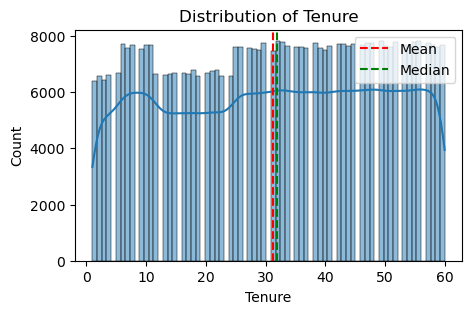

In [18]:
plot_histogram(df,"Tenure")

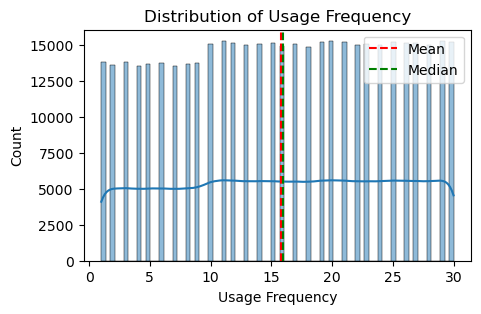

In [19]:
plot_histogram(df,"Usage Frequency")

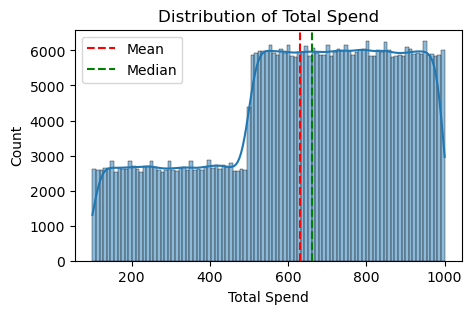

In [20]:
plot_histogram(df,"Total Spend")

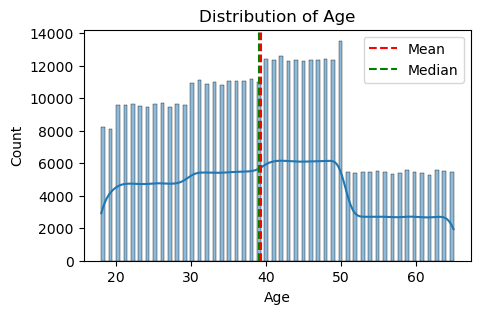

In [104]:
plot_histogram(df,'Age')

#### Box plot for Numerical Features

In [21]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f"Box plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

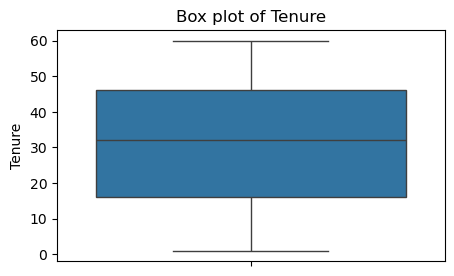

In [22]:
plot_boxplot(df,"Tenure")

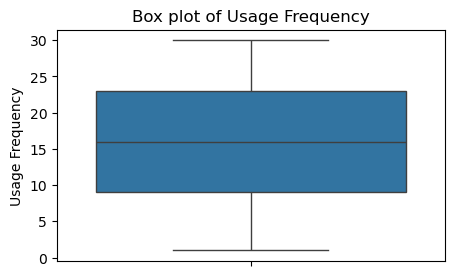

In [23]:
plot_boxplot(df,"Usage Frequency")

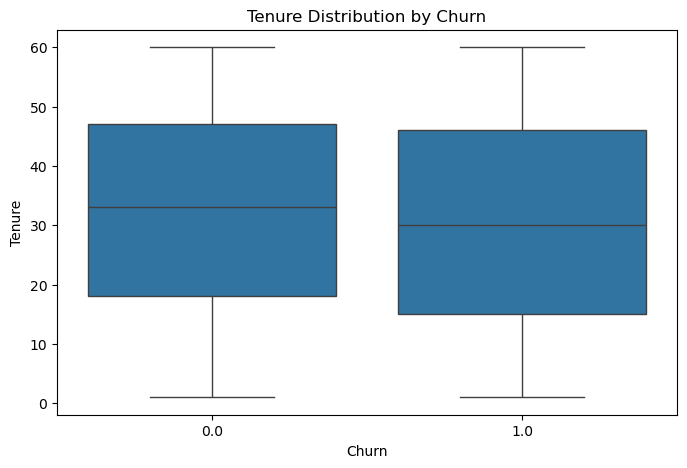

In [162]:
# Tenure Distribtion by Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title('Tenure Distribution by Churn')
plt.show()


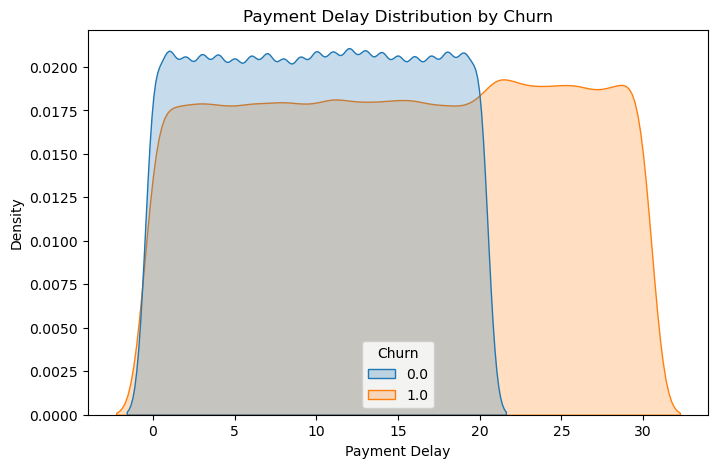

In [163]:
# payment Delay Distribution by churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Payment Delay', hue='Churn', fill=True)
plt.title('Payment Delay Distribution by Churn')
plt.show()


#### Correlation Heatmap of the NUmerical Variables

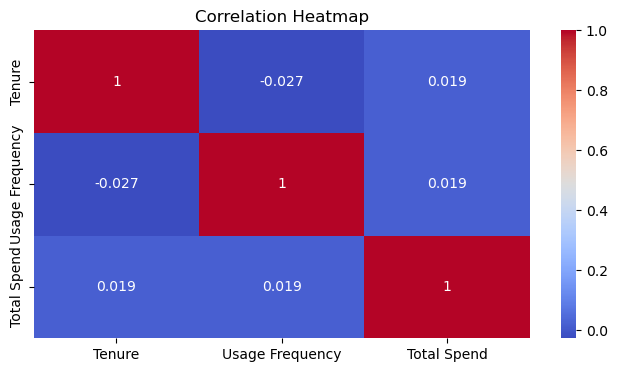

In [115]:
# Correlation matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[["Tenure","Usage Frequency","Total Spend"]].corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### 4. Data Preprocessing

In [25]:
df.head(3)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0


#### Label encoding of Target columns

In [42]:
df.sample(3)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
258781,38.0,1,25.0,20.0,1.0,10.0,0,0,521.67,27.0,0.0
171811,36.0,0,23.0,4.0,1.0,5.0,1,1,179.00,25.0,1.0
235121,59.0,1,33.0,7.0,6.0,12.0,1,1,102.26,18.0,1.0


In [150]:
print(df["Churn"].value_counts())

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


#### Train and Test data split

In [44]:
# spliting the features and Target
x=df.drop(columns=["Churn"])
y=df["Churn"]

In [71]:
# Spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
print(y_train.shape)

(352665,)


In [47]:
print(y_train.value_counts())

Churn
1.0    199895
0.0    152770
Name: count, dtype: int64


#### Label encoding of categorical features

In [151]:
# identifying columns with object data type
object_columns=df.select_dtypes(include="object").columns

In [152]:
print(object_columns)

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [154]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column].astype(str))
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [155]:
encoders

{'Gender': LabelEncoder(),
 'Subscription Type': LabelEncoder(),
 'Contract Length': LabelEncoder()}

In [156]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


### 5. Model Training

In [81]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    start = time.time()
    model.fit(x_train, y_train)
    fit_time = round(time.time() - start, 2)

    y_pred = model.predict(x_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = float('nan')

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc,
        "Specificity": specificity_score(y_test, y_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred),
        "Time (s)": fit_time
    }
    return name, metrics
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, solver='liblinear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=6, min_samples_split=20, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42),
    "Gaussian NB": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier(max_iter=200, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=50, max_depth=6, n_jobs=-1, random_state=42),
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=200, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=30, n_jobs=-1, random_state=42),
    "MLP (Shallow NN)": MLPClassifier(max_iter=300, hidden_layer_sizes=(50,), random_state=42)
}

# === Train and evaluate ===
results = []
for name, model in models.items():
    print(f"Training {name}...")
    try:
        model_name, metrics = evaluate_model(name, model, x_train, y_train, x_test, y_test)
        results.append((model_name, metrics))
    except Exception as e:
        print(f" Error with {name}: {e}")

# === Show comparison table ===
metrics_df = pd.DataFrame({name: metrics for name, metrics in results}).T.round(4)
metrics_df = metrics_df.sort_values("F1 Score", ascending=False)

print("\n=== Model Comparison Table ===")
print(metrics_df)


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training AdaBoost...


C:\Users\owais\n\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training XGBoost...


C:\Users\owais\n\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:26:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Gaussian NB...
Training QDA...
Training Ridge Classifier...
Training Extra Trees...
Training Passive Aggressive...
Training Bagging...
Training MLP (Shallow NN)...

=== Model Comparison Table ===
                     Accuracy  Precision  Recall  F1 Score  ROC AUC  \
Bagging                0.9972     0.9999  0.9951    0.9975   1.0000   
Gradient Boosting      0.9700     0.9948  0.9521    0.9729   0.9971   
AdaBoost               0.9697     0.9965  0.9499    0.9727   0.9960   
XGBoost                0.9652     0.9948  0.9435    0.9685   0.9971   
Random Forest          0.9576     0.9947  0.9302    0.9614   0.9967   
MLP (Shallow NN)       0.9571     0.9917  0.9321    0.9610   0.9845   
Decision Tree          0.9546     0.9999  0.9200    0.9583   0.9669   
Extra Trees            0.9405     0.9921  0.9022    0.9450   0.9912   
QDA                    0.9255     0.9748  0.8916    0.9314   0.9753   
Gaussian NB            0.9056     0.9586  0.8711    0.9127   0.9652   
Logistic Regre

In [82]:
# Save the result
metrics_df.to_csv("model_comparison.csv")


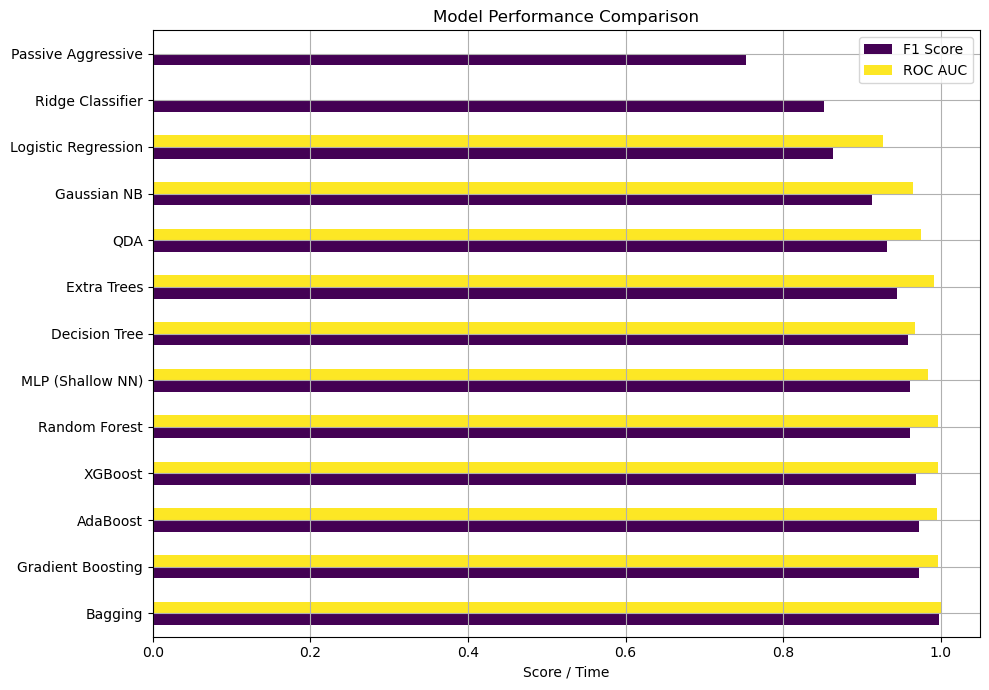

In [164]:
# visualize the result
metrics_df[['F1 Score', 'ROC AUC']].plot(kind='barh', figsize=(10, 7), colormap='viridis')
plt.title("Model Performance Comparison")
plt.xlabel("Score / Time")
plt.grid(True)
plt.tight_layout()
plt.show()


Bagging Classifier achieved the highest performance overall with an F1 Score of 0.9975, ROC AUC of 1.0, and nearly perfect specificity and recall, making it ideal when both false positives and false negatives are costly.

XGBoost showed an excellent balance of performance and speed, reaching an F1 Score of 0.9685 in just 1.36 seconds, making it a strong candidate for real-time or resource-constrained environments.

Gradient Boosting and AdaBoost also delivered high F1 scores (~0.973), with very high precision, indicating their reliability in minimizing false positives.

Logistic Regression and Ridge Classifier performed decently with F1 scores around 0.85 but lagged behind ensemble models, especially in handling complex decision boundaries.

The MLP (Neural Network) performed well in terms of accuracy and F1 score but had the longest training time (~20 minutes), which may not be ideal for large-scale iterative training.

In [85]:
import joblib
joblib.dump(models['XGBoost'], "best_model_xgboost.pkl")


['best_model_xgboost.pkl']

### Feature Importance / SHAP Analysis

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

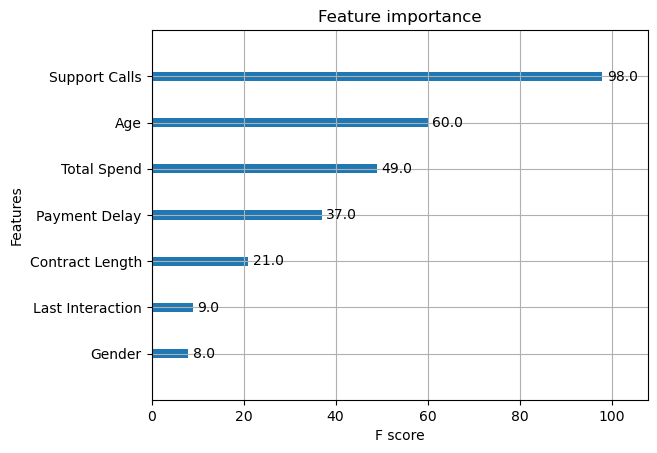

In [88]:
from xgboost import plot_importance
plot_importance(models['XGBoost'])


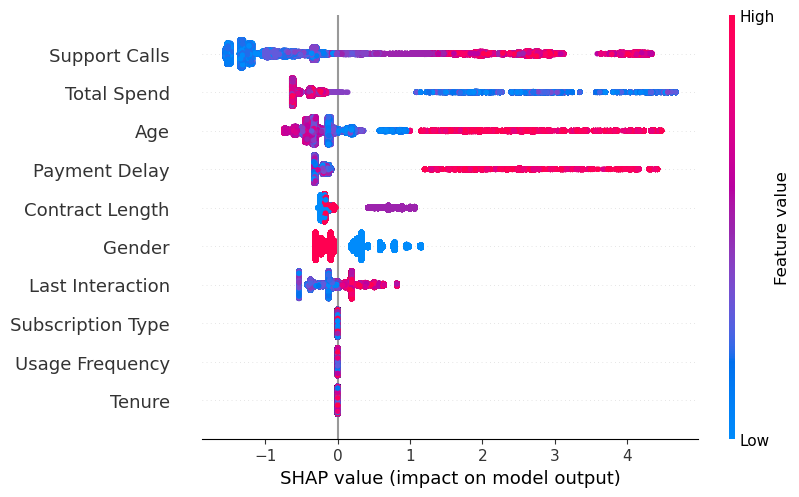

In [89]:
import shap
explainer = shap.Explainer(models['XGBoost'])
shap_values = explainer(x_test)
shap.plots.beeswarm(shap_values)


#### KNN ans SVM models

In [45]:
# Fit the KNN model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Predict class labels
y_pred = knn.predict(x_test)

# Predict probabilities (needed for AUC)
y_proba = knn.predict_proba(x_test)[:, 1]

# Calculate Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

# Print All Metrics
print(" Model Evaluation Metrics:")
print("Accuracy      :", round(acc * 100, 2), "%")
print("Precision     :", round(prec * 100, 2), "%")
print("Recall        :", round(rec * 100, 2), "%")
print("F1 Score      :", round(f1 * 100, 2), "%")
print("ROC AUC Score :", round(auc * 100, 2), "%")

print("\n Confusion Matrix:")
print(cm)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))



 Model Evaluation Metrics:
Accuracy      : 88.82 %
Precision     : 95.69 %
Recall        : 84.11 %
F1 Score      : 89.53 %
ROC AUC Score : 93.52 %

 Confusion Matrix:
[[36167  1896]
 [ 7963 42141]]

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88     38063
         1.0       0.96      0.84      0.90     50104

    accuracy                           0.89     88167
   macro avg       0.89      0.90      0.89     88167
weighted avg       0.90      0.89      0.89     88167



In [17]:
# Support vector machine (SVM)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

# Overall Metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')  # or 'macro', 'micro'
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"\nSVM Accuracy: {accuracy:.4f}")
print(f"SVM Precision: {precision:.4f}")
print(f"SVM Recall: {recall:.4f}")
print(f"SVM F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))



SVM Accuracy: 0.8766
SVM Precision: 0.8861
SVM Recall: 0.8766
SVM F1 Score: 0.8772

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87     38063
         1.0       0.95      0.83      0.88     50104

    accuracy                           0.88     88167
   macro avg       0.88      0.88      0.88     88167
weighted avg       0.89      0.88      0.88     88167



### 6. Model Initialization and Hyperparameter Tuning for Random Forest, XGBoost, and Logistic Regression

In [34]:
#  Define hyperparameter space 
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2', None]  
}

#  Create the base model
rf = RandomForestClassifier(random_state=42)

#  Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,               # 20 random combinations
    scoring='f1',            # F1 score for classification
    cv=3,                    # 3-fold CV (faster)
    verbose=2,               # Show progress
    n_jobs=-1,               # Use all CPU cores
    random_state=42
)

#  Fit the model
random_search.fit(x_train, y_train)

#  Print best parameters
print("Best Random Forest Params:", random_search.best_params_)

#  Evaluate on test set
y_pred = random_search.predict(x_test)
print("F1 Score on test set:", f1_score(y_test, y_pred))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
F1 Score on test set: 0.9997604503533357


In [35]:
#  Use 10% of training data for hyperparameter tuning
x_small, _, y_small, _ = train_test_split(x_train, y_train, train_size=0.1, random_state=42)

#  Define reduced search space
param_dist_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}

#  Initialize model
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

#  Perform RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=20,           # Try 20 random combinations
    scoring='f1',
    cv=3,                # 3-fold CV (faster than 5)
    verbose=2,           # Show progress
    n_jobs=-1,           # Use all CPU cores
    random_state=42
)

#  Fit on 10% sample for speed
random_search_xgb.fit(x_small, y_small)

#  Retrain on full training set with best params
best_xgb = random_search_xgb.best_estimator_
best_xgb.fit(x_train, y_train)

#  Evaluate on test data
y_pred_xgb = best_xgb.predict(x_test)
print("Best XGBoost Params:", random_search_xgb.best_params_)
print("F1 Score on test set:", f1_score(y_test, y_pred_xgb))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
F1 Score on test set: 0.9998602738632281


In [41]:
# Tuned Logistic Regression
# Use 10% of training data for faster tuning
x_small, _, y_small, _ = train_test_split(x_train, y_train, train_size=0.1, random_state=42)

# Define the parameter space
param_dist_logreg = {
    'C': loguniform(1e-2, 1e1),               # C in log scale: from 0.01 to 10
    'solver': ['saga'],                      # Only solver compatible with elasticnet
    'penalty': ['elasticnet'],               # elasticnet needs 'saga'
    'l1_ratio': [0.0, 0.5, 1.0]              # Mix of L1 and L2
}

# Create the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Set up RandomizedSearchCV
random_search_logreg = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist_logreg,
    n_iter=15,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit on the smaller subset
random_search_logreg.fit(x_small, y_small)

# Retrain best model on full training set
best_logreg = random_search_logreg.best_estimator_
best_logreg.fit(x_train, y_train)

# Predict and evaluate on test set
y_pred_logreg = best_logreg.predict(x_test)
print("Best Logistic Regression Params:", random_search_logreg.best_params_)
print("F1 Score on test set:", f1_score(y_test, y_pred_logreg))


Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\owais\n\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Logistic Regression Params: {'C': 0.6173770394704572, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
F1 Score on test set: 0.8663432654055371


#### Evaluation of Models

In [98]:
results = []
results.append(evaluate_model(random_search.best_estimator_, "Tuned Random Forest", x_test, y_test))
results.append(evaluate_model(random_search_xgb.best_estimator_, "Tuned XGBoost", x_test, y_test))
results.append(evaluate_model(random_search_logreg.best_estimator_, "Tuned Logistic Regression", x_test, y_test))

# Final comparison table
results_df = pd.DataFrame(results).set_index("Model")
display(results_df)



--- Tuned Random Forest ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9999
F1 Score: 1.0000
ROC AUC: 1.0000
Specificity: 1.0000
Balanced Accuracy: 1.0000
Confusion Matrix:
[[38167     0]
 [    4 49996]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167


--- Tuned XGBoost ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9999
F1 Score: 1.0000
ROC AUC: 1.0000
Specificity: 1.0000
Balanced Accuracy: 1.0000
Confusion Matrix:
[[38167     0]
 [    4 49996]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
 

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Specificity,Balanced Accuracy
Model,,,,,,,
Tuned Random Forest,0.999955,1.000000,0.99992,0.999960,0.999960,1.000000,0.999960
Tuned XGBoost,0.999955,1.000000,0.99992,0.999960,0.999960,1.000000,0.999960
Tuned Logistic Regression,0.850772,0.878273,0.85542,0.866696,0.850051,0.844683,0.850051


In [100]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(random_search.best_estimator_, x_train, y_train, cv=5, scoring='f1', n_jobs=-1)
print(f"Cross-validated F1 mean: {cv_scores.mean():.4f}, std: {cv_scores.std():.4f}")


Cross-validated F1 mean: 0.9874, std: 0.0150


### 7. Load the saved model and build a Predictive System

In [121]:

# Save the best XGBoost model with feature names
model_data = {
    "model": random_search.best_estimator_,
    "features_names": x_train.columns.tolist()
}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved successfully.")
loaded_model = model_data["model"]
feature_names = model_data["features_names"]

Model saved successfully.


In [122]:
print(loaded_model)

RandomForestClassifier(n_estimators=200, random_state=42)


In [123]:
print(feature_names)

['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']


In [159]:
import pandas as pd
import pickle

#  Load the model
with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
expected_features = model_data["features_names"]

#  Load the encoders
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

#  Prepare new input
input_data = {
    "Age": 22,
    "Gender": "Female",
    "Tenure": 25,
    "Usage Frequency": 14,
    "Support Calls": 4,
    "Payment Delay": 27,
    "Subscription Type": "Basic",
    "Contract Length": "Monthly",
    "Total Spend": 598,
    "Last Interaction": 9
}
input_df = pd.DataFrame([input_data])

#  Apply encoders to required categorical columns
for col in ["Gender", "Subscription Type", "Contract Length"]:
    if col in encoders:
        input_df[col] = encoders[col].transform(input_df[[col]])
    else:
        raise ValueError(f"Encoder for '{col}' not found.")

#  Ensure feature order matches training
input_df = input_df[expected_features]

#  Predict
prediction = loaded_model.predict(input_df)
prob = loaded_model.predict_proba(input_df)

print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No churn'}")
print(f"Prediction Probability: {prob}")


Prediction: Churn
Prediction Probability: [[0. 1.]]


C:\Users\owais\n\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\owais\n\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\owais\n\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [158]:
input_data =  {
        "Age": 41,
        "Gender": "Female",
        "Tenure": 28,
        "Usage Frequency": 28,
        "Support Calls": 7,
        "Payment Delay": 13,
        "Subscription Type": "Standard",
        "Contract Length": "Monthly",
        "Total Spend": 584,
        "Last Interaction": 20
    }

input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
    if column in input_data_df.columns:
       input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'churn' if prediction[0] == 1 else 'No churn'}")
print(f"Prediciton Probability: {pred_prob}")

[1.]
Prediction: churn
Prediciton Probability: [[0. 1.]]
